In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
#First we will do Data analysis
train=pd.read_csv('titanic_train.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


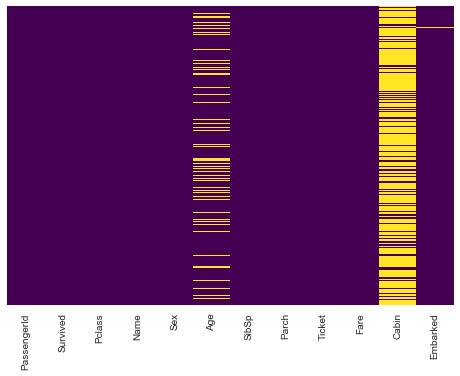

In [17]:
#find null value info
#Yellow are Null values which shows age and cabin values are missing
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
sns.set_style('whitegrid')

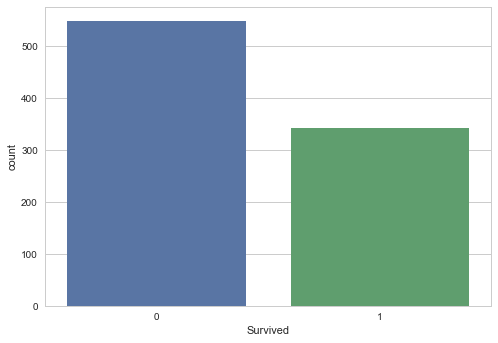

In [20]:
#Check survived count
sns.countplot(x='Survived',data=train)

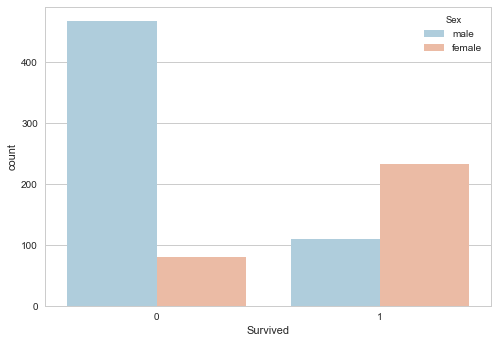

In [23]:
#Survived on Sex basis.This infer more men died ,could be in saving women.Ladies first
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

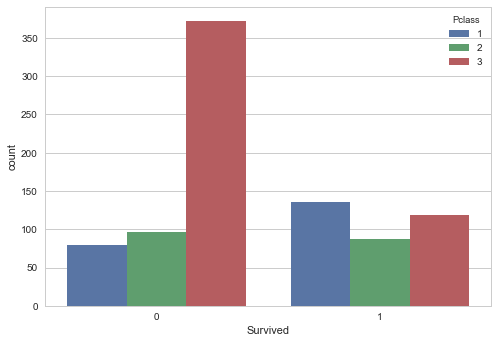

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=train)
#Class 3 died more

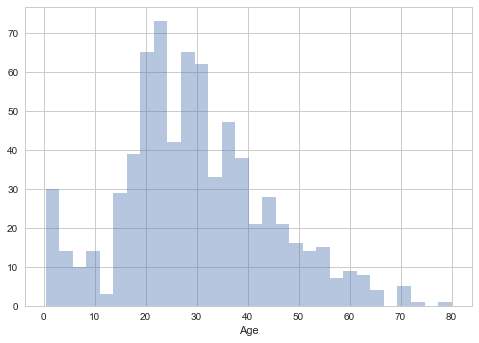

In [26]:
#Find age details
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

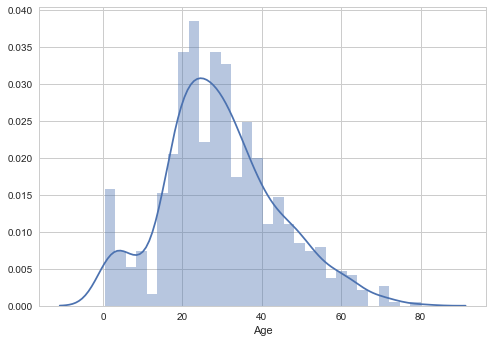

In [27]:
sns.distplot(train['Age'].dropna(),kde=True,bins=30)

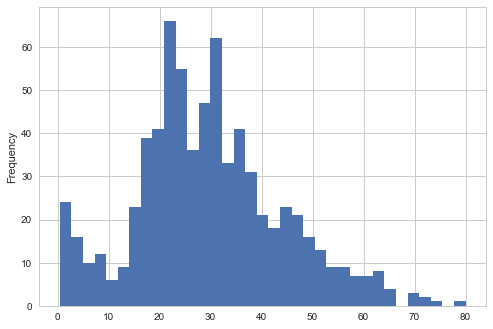

In [30]:
#Pandas own visualization
train['Age'].plot.hist(bins=35)

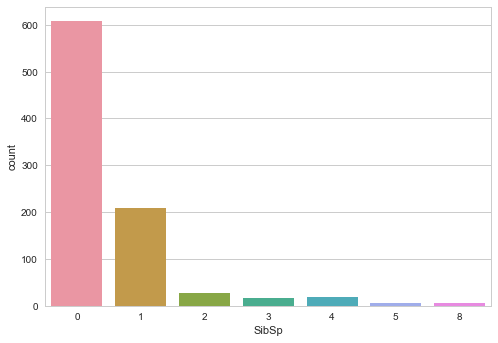

In [32]:
#siblings info. lot of people were single,probably from 3rd class
sns.countplot(x='SibSp',data=train)

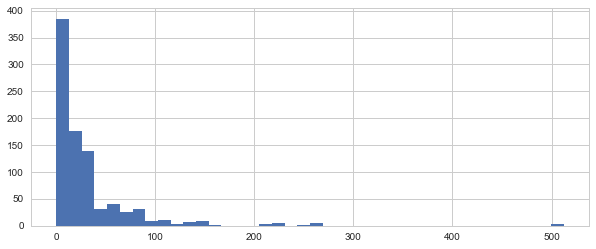

In [35]:
#Fair column
train['Fare'].hist(bins=40,figsize=(10,4))

In [36]:
import cufflinks as cf

In [44]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [45]:
train['Fare'].iplot(kind='hist',bins=30)

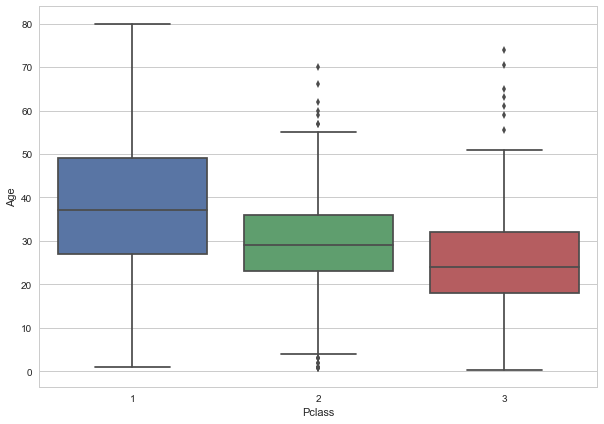

In [48]:
#Handle Null values/Clean data
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)
#here we see class 1 has more older than other which says to accumulate more money u need more time

In [50]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [51]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

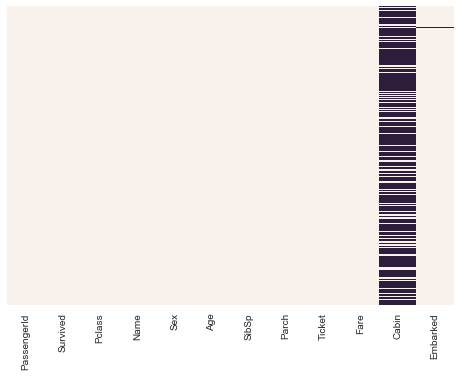

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [53]:
#Drop cabin colmn as lot of missing value
train.drop('Cabin',axis=1,inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


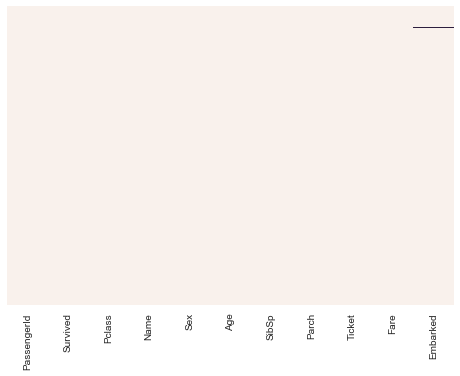

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [56]:
train.dropna(inplace=True)

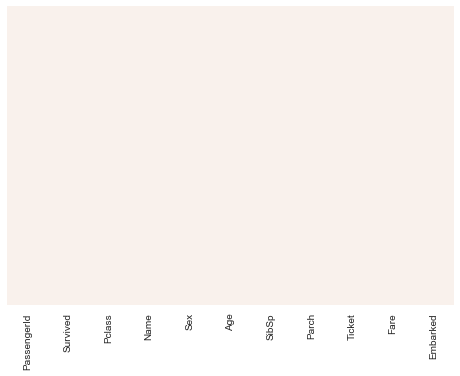

In [57]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [59]:
#In machine learning we need 0 or 1 so assign them against Sex-male/female &emabrked column.this is called dummy column
pd.get_dummies(train['Sex']).head()
#but this is problem as this is perfect prediction for algorithm i.e if not female this male.
#this is multi colinearity

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [60]:
#will drop first column here
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [62]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [63]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [65]:
train=pd.concat([train,sex,embark],axis=1)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [67]:
#Drop unwanted columns
train.drop(['Sex','Ticket','Embarked','Name'],axis=1,inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
train.drop('PassengerId',axis=1,inplace=True)

In [71]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [77]:
#Creat Model. y is the coulmn/value you have to predict
X=train.drop('Survived',axis=1)
y=train['Survived']

In [78]:
from sklearn.cross_validation import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
#Create logistic model
logmodel=LogisticRegression()

In [84]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predctions=logmodel.predict(X_test)

In [86]:
predctions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [87]:
from sklearn.metrics import  classification_report

In [88]:
print(classification_report(y_test,predctions))

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       174
          1       0.84      0.65      0.73       120

avg / total       0.81      0.81      0.80       294



In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test,predctions)

array([[159,  15],
       [ 42,  78]])